In [7]:
# imports qiskit library with aer simulator, visualizations, and quantum circuits
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit import transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import IBMQ

ibmqfactory.load_account:WARNING:2022-11-30 20:01:39,455: Credentials are already in use. The existing account in the session will be replaced.


ibmq_qasm_simulator
Number of qubits: 32
Number of pending jobs: 0

ibmq_lima
Number of qubits: 5
Number of pending jobs: 34

ibmq_belem
Number of qubits: 5
Number of pending jobs: 19

ibmq_quito
Number of qubits: 5
Number of pending jobs: 43

simulator_statevector
Number of qubits: 32
Number of pending jobs: 0

simulator_mps
Number of qubits: 100
Number of pending jobs: 0

simulator_extended_stabilizer
Number of qubits: 63
Number of pending jobs: 0

simulator_stabilizer
Number of qubits: 5000
Number of pending jobs: 0

ibmq_manila
Number of qubits: 5
Number of pending jobs: 28

ibm_nairobi
Number of qubits: 7
Number of pending jobs: 23

ibm_oslo
Number of qubits: 7
Number of pending jobs: 10



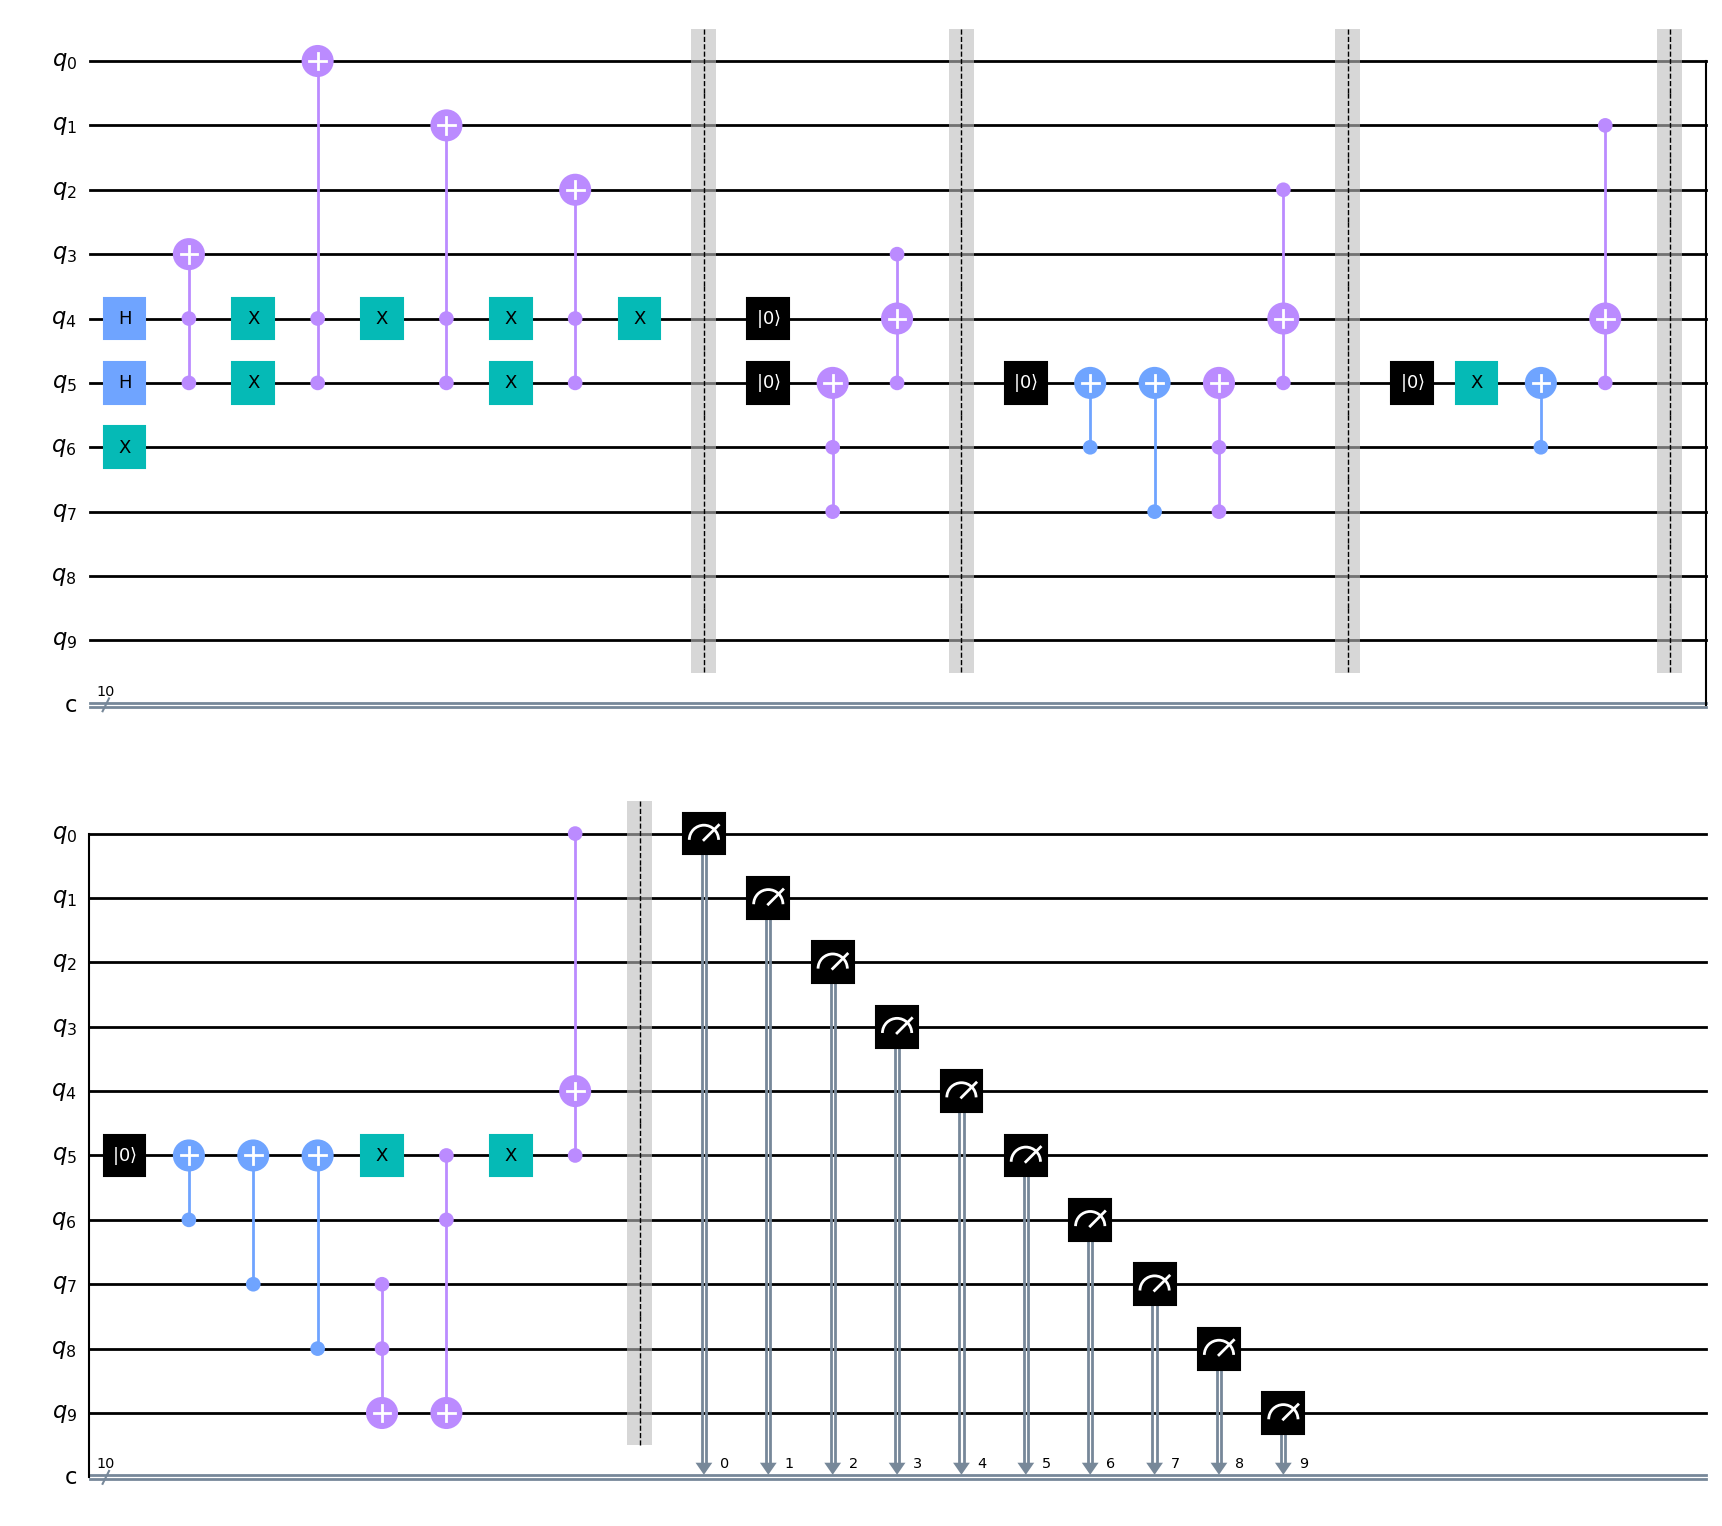

In [8]:
# accesses IBM account ID, laods account and returns the provider object which accesses all of the backends
IBMQ.save_account('d750de88088ceda8afe8a50dd509ca58e698630088a155d74501e82bb4a61ce45d249d1e3499d074dda56de84b512d77fc4174ff29766bffbdc9b5faf0d31d93', overwrite=True)
provider = IBMQ.load_account()
myprovider = IBMQ.get_provider()

# prints the information for every backend in the provider (name, number of qubits, and number of pending jobs)
for b in myprovider.backends():
    print(b)
    print("Number of qubits: " + str(b.configuration().n_qubits))
    print ("Number of pending jobs: " + str(b.status().pending_jobs))
    print()
    
# implementation of a ripple carry adder with a variable number of full adders

circ = QuantumCircuit(10, 10)

circ.h(4)
circ.h(5)

circ.x(6)

circ.ccx(4,5,3)

circ.x(4)
circ.x(5)

circ.ccx(4,5,0)

circ.x(4)

circ.ccx(4,5,1)

circ.x(4)
circ.x(5)

circ.ccx(4,5,2)

circ.x(4)

circ.barrier()

circ.reset(4)
circ.reset(5)
circ.ccx(6,7,5)
circ.ccx(5,3,4)

circ.barrier()

circ.reset(5)
circ.cx(6,5)
circ.cx(7,5)
circ.ccx(6,7,5)
circ.ccx(5,2,4)

circ.barrier()

circ.reset(5)
circ.x(5)
circ.cx(6,5)
circ.ccx(5,1,4)

circ.barrier()

circ.reset(5)
circ.cx(6,5)
circ.cx(7,5)
circ.cx(8,5)
circ.ccx(7,8,9)
circ.x(5)
circ.ccx(6,5,9)
circ.x(5)
circ.ccx(0,5,4)
circ.barrier()
circ.measure(range(10),range(10))


circ.draw('mpl')

In [9]:
# aquires the specified backend, transpiles 'circ' for the toppology of the specified backend
# creates a job and adds it to that queue to be ran 100 times
backend = myprovider.get_backend('ibmq_qasm_simulator')
instructions = transpile(circ, backend)
simulation = backend.run(instructions, shots=100)

In [10]:
# can be ran intermitently to obtain the progress of the job in the queue
print(simulation.queue_info())

None


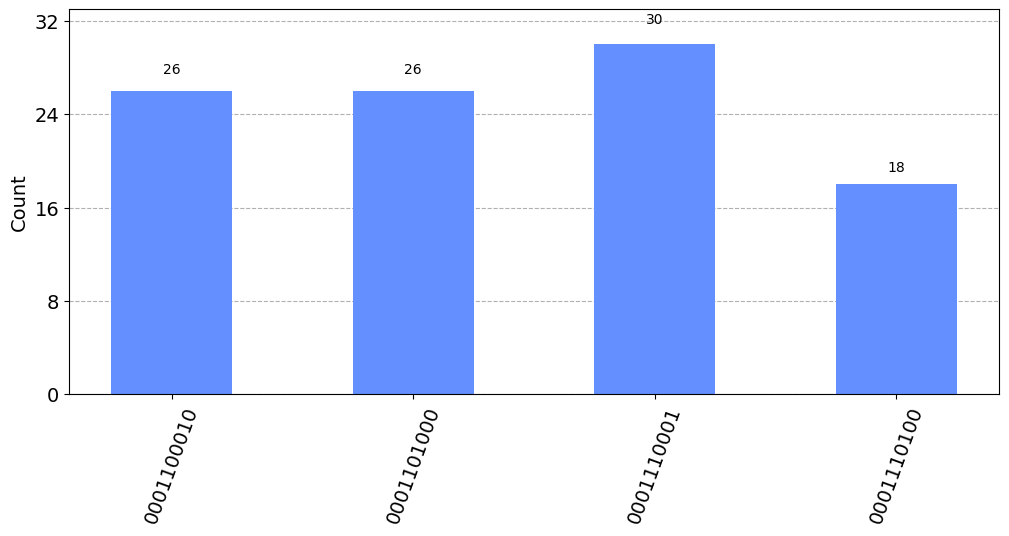

In [11]:
# obtains the results of the 100 runs and plots the histogram of all of the output configurations
results = simulation.result()
counts = results.get_counts(instructions)
plot_histogram(counts, figsize = (12,5))

In [12]:
# Import Qiskit's Jupyter tools
import qiskit.tools.jupyter

# Display the Qiskit version table
%qiskit_version_table